In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import joblib
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

#time
from datetime import datetime
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import dataset

In [ ]:
dataset = pandas.read_csv('/content/drive/MyDrive/Project/Project Final/Dataset/Combine_5000_packets.csv')

In [ ]:
print (dataset.shape)

(20438, 27)


Head

In [ ]:
print(dataset.head(20))

        ip.src      ip.dst  ip.len  ip.flags.df  ip.flags.mf  ip.fragment  \
0   3232235786  3232236810    60.0          1.0          0.0          0.0   
1   3232236810  3232235786    60.0          1.0          0.0          0.0   
2   3232235786  3232236810    52.0          1.0          0.0          0.0   
3   3232235786  3232236810   128.0          1.0          0.0          0.0   
4   3232236810  3232235786    52.0          1.0          0.0          0.0   
5   3232236810  3232235786  1119.0          1.0          0.0          0.0   
6   3232235786  3232236810    52.0          1.0          0.0          0.0   
7   3232235786  3232236810    52.0          1.0          0.0          0.0   
8   3232236810  3232235786    52.0          1.0          0.0          0.0   
9   3232235786  3232236810    52.0          1.0          0.0          0.0   
10  3232235786  3232236810    60.0          1.0          0.0          0.0   
11  3232236810  3232235786    60.0          1.0          0.0          0.0   

Descriptions

In [ ]:
print(dataset.describe())

             ip.src        ip.dst        ip.len   ip.flags.df   ip.flags.mf  \
count  2.043800e+04  2.043800e+04  20438.000000  20438.000000  20438.000000   
mean   3.204086e+09  3.206686e+09    281.812751      0.620168      0.122810   
std    3.003344e+08  3.051286e+08    504.675381      0.485357      0.328228   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    3.232236e+09  3.232236e+09     52.000000      0.000000      0.000000   
50%    3.232236e+09  3.232237e+09     60.000000      1.000000      0.000000   
75%    3.232237e+09  3.232237e+09     84.000000      1.000000      0.000000   
max    3.232237e+09  4.294967e+09   1500.000000      1.000000      1.000000   

        ip.fragment  ip.fragment.count  ip.fragments        ip.ttl  \
count  20438.000000       20438.000000       20438.0  20438.000000   
mean     308.634749           0.245621           0.0     62.319845   
std      969.128426           0.656455           0.0      7.364453   
min     

Plot correlation

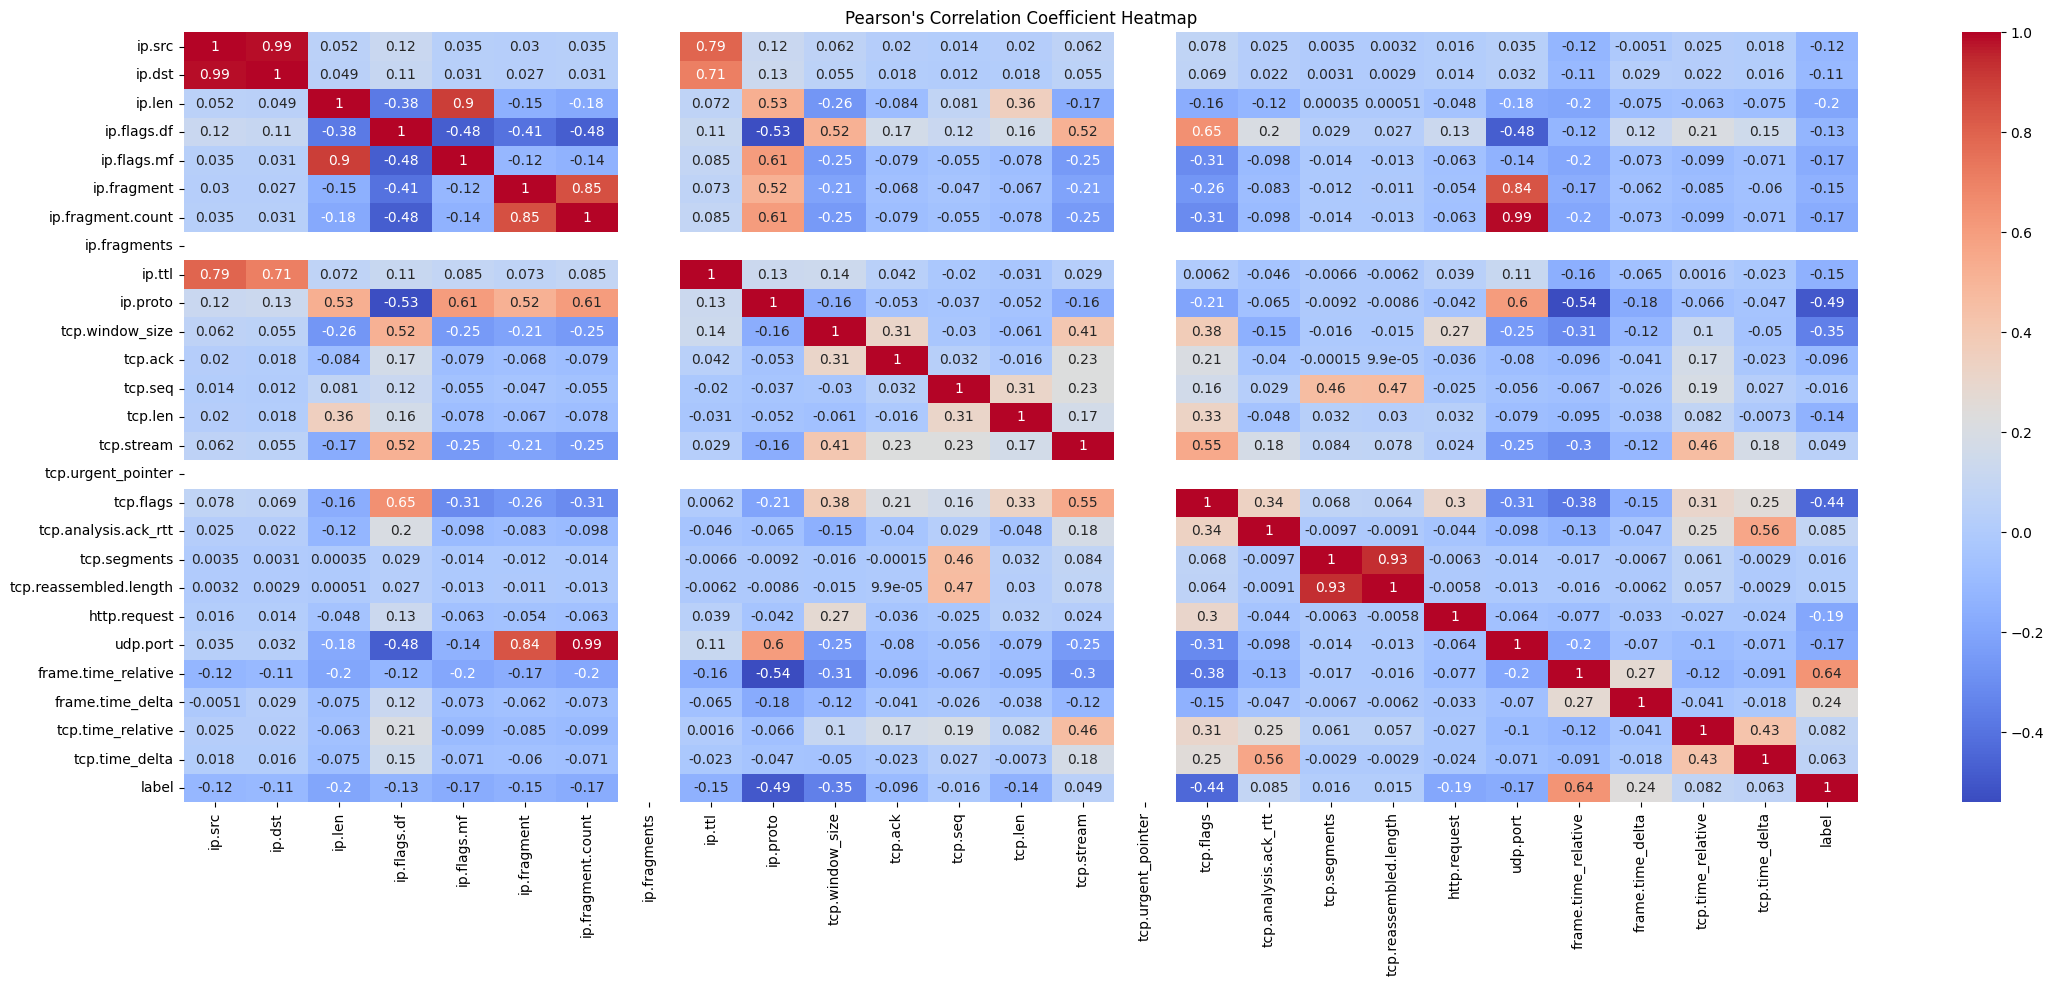

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Compute the correlation matrix
corr_matrix = dataset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(27, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title("Pearson's Correlation Coefficient Heatmap")
#plt.xticks(rotation=45)
#plt.yticks(rotation=0)
plt.show()

Cut in feature

In [ ]:
dataset.columns

Index(['ip.src', 'ip.dst', 'ip.len', 'ip.flags.df', 'ip.flags.mf',
       'ip.fragment', 'ip.fragment.count', 'ip.fragments', 'ip.ttl',
       'ip.proto', 'tcp.window_size', 'tcp.ack', 'tcp.seq', 'tcp.len',
       'tcp.stream', 'tcp.urgent_pointer', 'tcp.flags', 'tcp.analysis.ack_rtt',
       'tcp.segments', 'tcp.reassembled.length', 'http.request', 'udp.port',
       'frame.time_relative', 'frame.time_delta', 'tcp.time_relative',
       'tcp.time_delta', 'label'],
      dtype='object')

In [ ]:
cols = ['ip.src', 'ip.dst', 'ip.len', 'ip.flags.df',
        'ip.flags.mf','ip.fragment','ip.fragment.count', 'ip.fragments',
        'ip.ttl', 'ip.proto', 'tcp.window_size',
        'tcp.ack', 'tcp.seq', 'tcp.len', 'tcp.stream',
        'tcp.urgent_pointer', 'tcp.flags', 'tcp.analysis.ack_rtt',
        'tcp.segments', 'tcp.reassembled.length', 'http.request',
        'udp.port','frame.time_relative', 'frame.time_delta',
        'tcp.time_relative', 'tcp.time_delta',
        'label']
A = dataset[cols]

In [ ]:
correlation_matrix = A.corr()

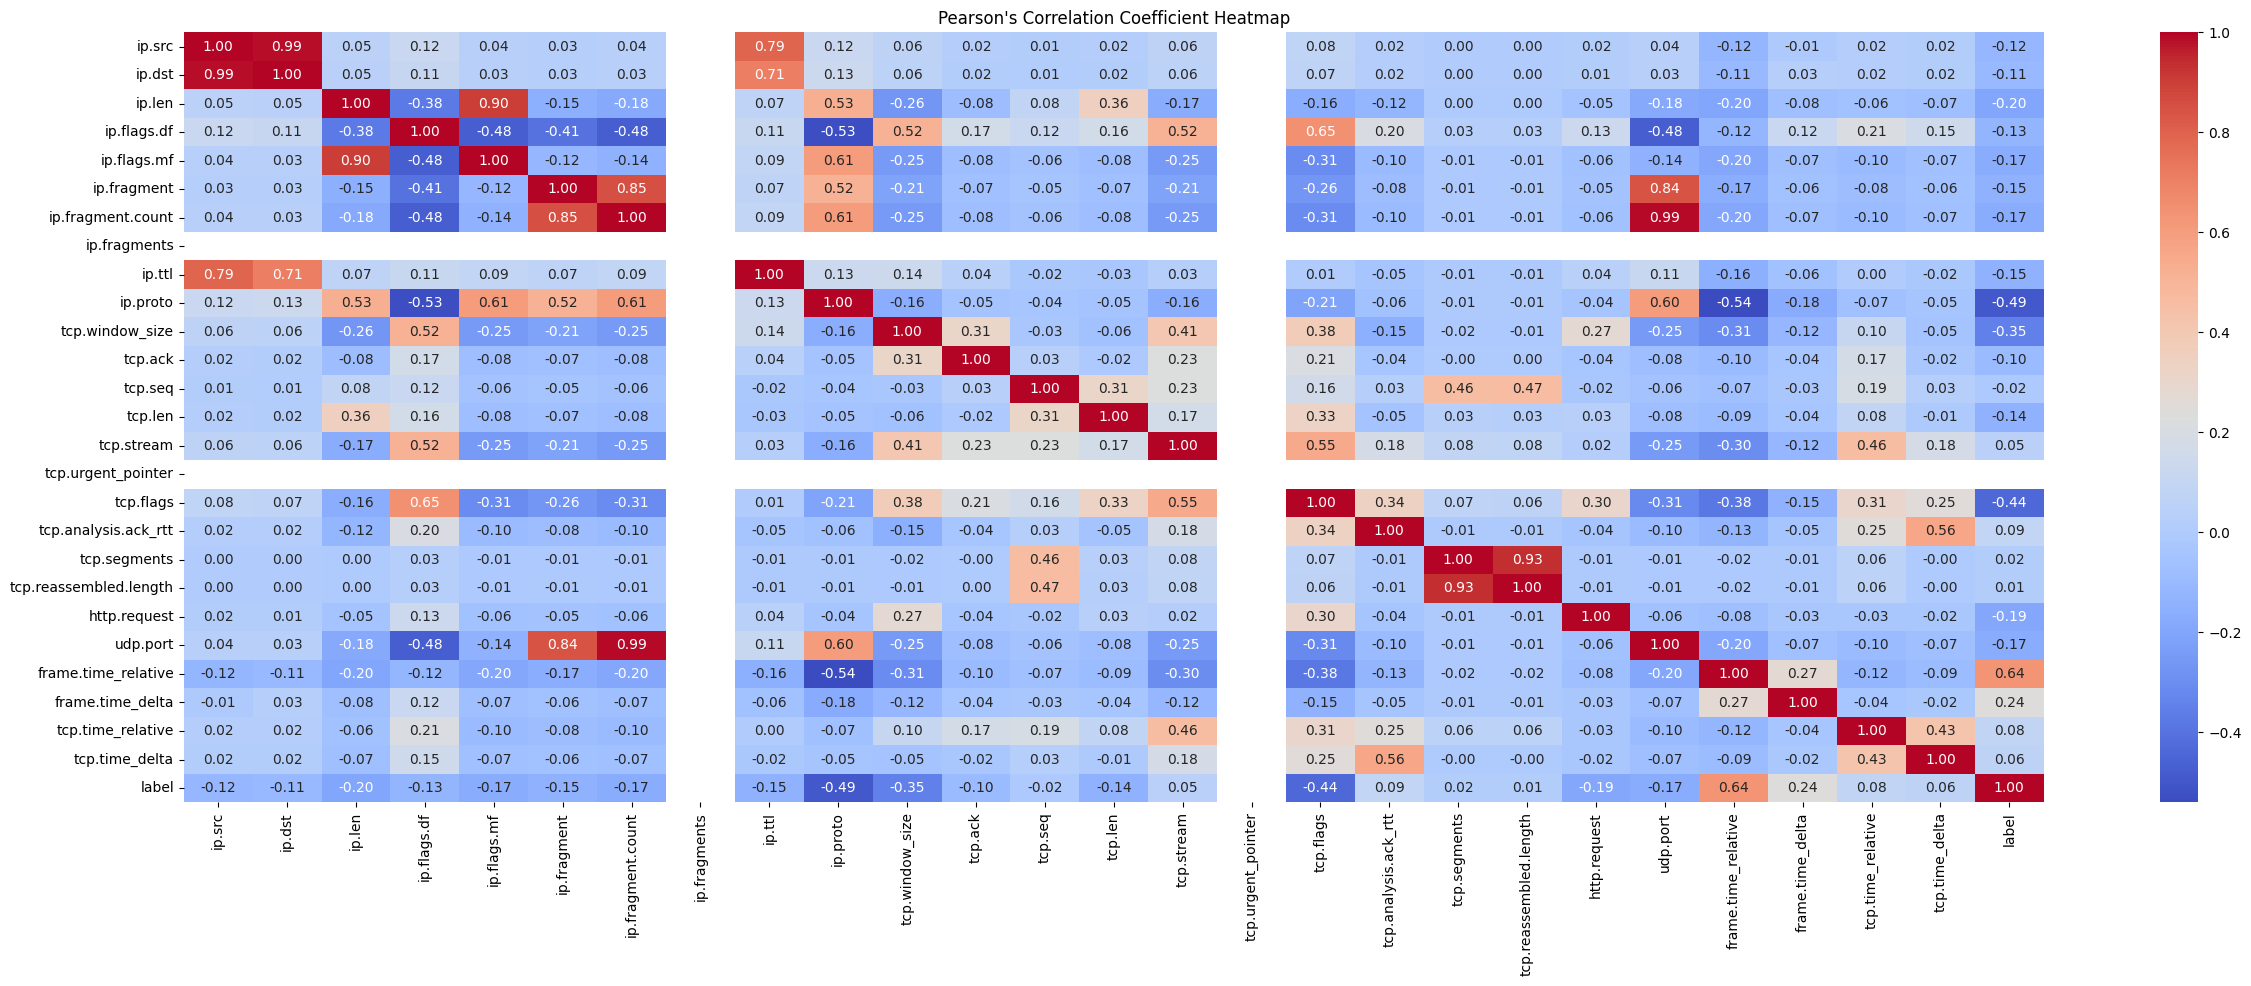

In [ ]:
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Coefficient Heatmap")
plt.show()

class distribution

In [ ]:
print(A.groupby('label').size())

label
1    5036
2    5030
3    5158
4    5214
dtype: int64


split dataset

In [ ]:
# split dataset
array = A.values
print (array)
X = array[:,0:26]
Y = array[:,26]
validation_size = 0.30
seed = 42

[[3.23223579e+09 3.23223681e+09 6.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.23223681e+09 3.23223579e+09 6.00000000e+01 ... 1.36300000e-02
  1.36300000e-02 1.00000000e+00]
 [3.23223579e+09 3.23223681e+09 5.20000000e+01 ... 1.36790000e-02
  4.90000000e-05 1.00000000e+00]
 ...
 [3.23223578e+09 4.29496730e+09 1.12000000e+02 ... 0.00000000e+00
  0.00000000e+00 4.00000000e+00]
 [3.23223578e+09 4.29496730e+09 1.12000000e+02 ... 0.00000000e+00
  0.00000000e+00 4.00000000e+00]
 [3.23223578e+09 4.29496730e+09 1.12000000e+02 ... 0.00000000e+00
  0.00000000e+00 4.00000000e+00]]


In [ ]:
print (X)
print (Y)

[[3.23223579e+09 3.23223681e+09 6.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.23223681e+09 3.23223579e+09 6.00000000e+01 ... 1.36300000e-02
  1.36300000e-02 1.36300000e-02]
 [3.23223579e+09 3.23223681e+09 5.20000000e+01 ... 4.90000000e-05
  1.36790000e-02 4.90000000e-05]
 ...
 [3.23223578e+09 4.29496730e+09 1.12000000e+02 ... 1.01676600e+00
  0.00000000e+00 0.00000000e+00]
 [3.23223578e+09 4.29496730e+09 1.12000000e+02 ... 6.14965560e+01
  0.00000000e+00 0.00000000e+00]
 [3.23223578e+09 4.29496730e+09 1.12000000e+02 ... 6.46277830e+01
  0.00000000e+00 0.00000000e+00]]
[1. 1. 1. ... 4. 4. 4.]


In [ ]:
print (X)

In [ ]:
print (Y)

Split dataset into training set and test set

เปลี่ยนตัวแปร

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
X_train_set, X_validation, Y_train_set, Y_validation = model_selection.train_test_split(X_train, Y_train, test_size=validation_size, random_state=seed)

In [ ]:
# Test options and evaluation metric
scoring = 'accuracy'

In [ ]:
# Evaluating algorithm model
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ANN', MLPClassifier()))

In [ ]:
# evaluate each model in turn
results = []
names = []
times = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
        start_time = time.time()
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append(cv_results)
        names.append(name)
        times.append(execution_time)
        msg = "%s Accuracy: %f (+/- %f),  Processing time: %.2f seconds" % (name, cv_results.mean(), cv_results.std(), execution_time)
        print(msg)

SyntaxError: ignored

# LR Classification report



In [ ]:
# Make predictions on validation dataset
print("\n LR results on 30% validation set \n")


 LR results on 30% validation set 



In [ ]:
# Create Decision Tree classifer object
lr = LogisticRegression()

In [ ]:
# Train Decision Tree Classifer
lr.fit(X_train_set, Y_train_set)

LogisticRegression()

In [ ]:
#saving the model using joblib
filename = 'finalized_LR_model.sav'
joblib.dump(lr, filename)

['finalized_LR_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.2646784715750233


In [ ]:
#Predict the response for validation dataset
predictions_rfc = lr.predict(X_validation)
print("\nLR accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names, digits=6))


LR accuracy validation: 

0.2646784715750233
[[   0    0 1057    1]
 [   0    0 1057    0]
 [   0    0 1095    1]
 [   0    0 1040   41]]
              precision    recall  f1-score   support

      Benign   0.000000  0.000000  0.000000      1058
         Dos   0.000000  0.000000  0.000000      1057
       Probe   0.257708  0.999088  0.409729      1096
      Normal   0.953488  0.037928  0.072954      1081

    accuracy                       0.264678      4292
   macro avg   0.302799  0.259254  0.120671      4292
weighted avg   0.305957  0.264678  0.123002      4292



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Make predictions on test dataset
print("\nLR results on final 30% test \n")
newlr = LogisticRegression()
newlr.fit(X_train_set, Y_train_set)
newpredictions_rfc = newlr.predict(X_test)
print("\nLR accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names, digits=6))



LR results on final 30% test 


LR accuracy test: 

0.26386170906718853
[[   0    0 1481    2]
 [   0    0 1530    1]
 [   0    0 1538    1]
 [   0    0 1499   80]]
              precision    recall  f1-score   support

      Benign   0.000000  0.000000  0.000000      1483
         Dos   0.000000  0.000000  0.000000      1531
       Probe   0.254299  0.999350  0.405430      1539
      Normal   0.952381  0.050665  0.096212      1579

    accuracy                       0.263862      6132
   macro avg   0.301670  0.262504  0.125411      6132
weighted avg   0.309063  0.263862  0.126529      6132



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cart test classification report


Make predictions on validation dataset

In [ ]:
# Make predictions on validation dataset
print("\n CART results on 30% validation set \n")

In [ ]:
# Create Decision Tree classifer object
cart = DecisionTreeClassifier()

In [ ]:
# Train Decision Tree Classifer
cart.fit(X_train_set, Y_train_set)

In [ ]:
#saving the model using joblib
filename = 'finalized_CART_model.sav'
joblib.dump(cart, filename)

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

In [ ]:
#Predict the response for test dataset
predictions_rfc = cart.predict(X_validation)
print("\nCART accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names, digits=6))

In [ ]:
# Make predictions on test dataset
print("\nCART results on final 30% test \n")
newcart = DecisionTreeClassifier()
newcart.fit(X_train_set, Y_train_set)
newpredictions_rfc = newcart.predict(X_test)
print("\nCART accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))

# NB Classification report

In [ ]:
# Make predictions on validation dataset
print("\n NB results on 30% validation set \n")

In [ ]:
# Create Decision Tree classifer object
nb = GaussianNB()

In [ ]:
# Train Decision Tree Classifer
nb.fit(X_train_set, Y_train_set)

In [ ]:
#saving the model using joblib
filename = 'finalized_NB_model.sav'
joblib.dump(nb, filename)

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

In [ ]:
#Predict the response for validation dataset
predictions_rfc = nb.predict(X_validation)
print("\nNB accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))

In [ ]:
# Make predictions on test dataset
print("\nNB results on final 30% test \n")
newnb = GaussianNB()
newnb.fit(X_train_set, Y_train_set)
newpredictions_rfc = newnb.predict(X_test)
print("\nNB accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))

# ANN Classification report

In [ ]:
# Make predictions on validation dataset
print("\n ANN results on 30% validation set \n")

In [ ]:
# Create Decision Tree classifer object
ann = MLPClassifier()

In [ ]:
# Train Decision Tree Classifer
ann.fit(X_train_set, Y_train_set)

In [ ]:
#saving the model using joblib
filename = 'finalized_ANN_model.sav'
joblib.dump(ann, filename)

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

In [ ]:
#Predict the response for validation dataset
predictions_rfc = ann.predict(X_validation)
print("\nANN accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))

In [ ]:
# Make predictions on test dataset
print("\nANN results on final 30% test \n")
newann = MLPClassifier()
newann.fit(X_train_set, Y_train_set)
newpredictions_rfc = newann.predict(X_test)
print("\nANN accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from datetime import datetime
import time

# Evaluating algorithm model
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ANN', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
times = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
        start_time = time.time()
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append(cv_results)
        names.append(name)
        times.append(execution_time)
        msg = "%s Accuracy: %f (+/- %f),  Processing time: %.2f seconds" % (name, cv_results.mean(), cv_results.std(), execution_time)
        print(msg)


In [ ]:
# Evaluating algorithm model
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ANN', MLPClassifier()))

In [ ]:
# evaluate each model in turn
results = []
names = []
times = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
        start_time = time.time()
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append(cv_results)
        names.append(name)
        times.append(execution_time)
        msg = "%s Accuracy: %f (+/- %f),  Processing time: %.2f seconds" % (name, cv_results.mean(), cv_results.std(), execution_time)
        print(msg)

SyntaxError: ignored